In [40]:
import numpy as np
import math, codecs
from IPython.display import Image

# get a glimpse of how Naive Bayes works

In [41]:
ls slides

20121202-210149.jpg
LogReg_1.png
Sent_analysis_toy_data.PNG
WARNING-Unregulated-Advice.jpg
arrays.png
bucket_small.jpg
df6e1227-49e5-4086-a87a-dbe04bb36c45-original.png
gob-bluth.jpg
is_he_telling_the_truth.jpg
machine_learning.jpg
matplotlib.png
metrics.png
ml-robot.png
ml_map.png
naive_bayes_doc6.PNG
naive_bayes_goal.PNG
naive_bayes_posterior_just_counting.PNG
naive_bayes_sent_an.PNG
naive_bayes_smoothing.PNG
pandas and scikit.png
pandas-drinking-cr.png
paretto.png
partition.png
python.png
reg.png
scikit-learn-logo-notext.png
self-reference.jpg
titanic.jpeg
underfitting-overfitting.png
what_is.png


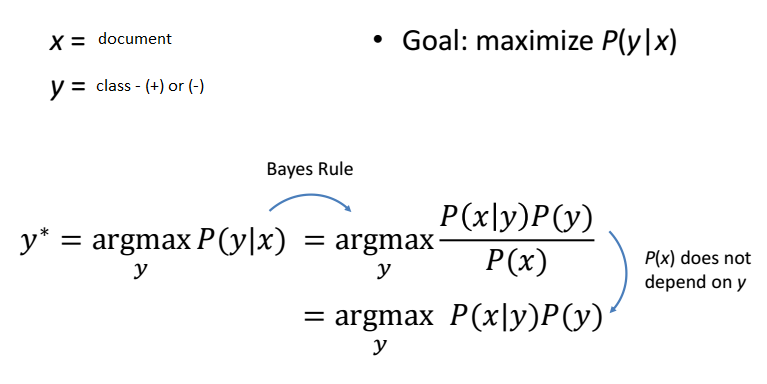

In [42]:
Image(filename="slides/naive_bayes_sent_an.PNG")

# get a glimpse of the toy data

##### Image(filename="slides/Sent_analysis_toy_data.PNG")

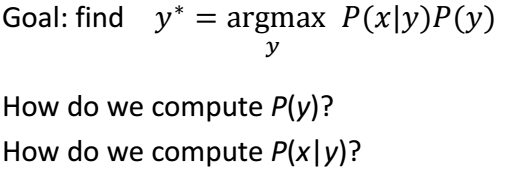

In [43]:
Image(filename="slides/naive_bayes_goal.PNG")

In [44]:
print "Hello"

Hello


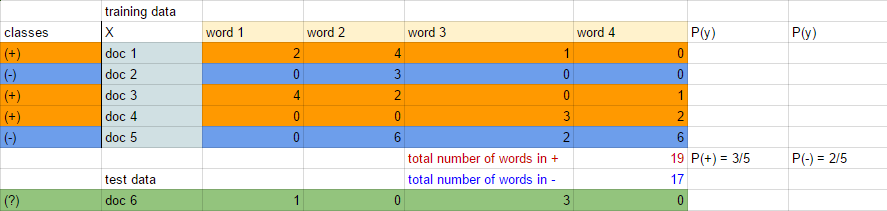

In [45]:
Image(filename="slides/Sent_analysis_toy_data.PNG")

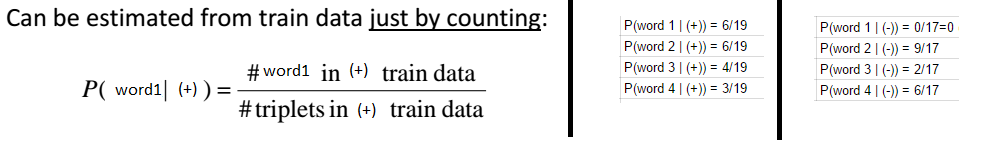

In [46]:
Image(filename="slides/naive_bayes_posterior_just_counting.PNG")

# That can't be - the probability of word1 in a negative document is 0? Let's smooth it:

In [47]:
Image(filename="slides/naive_bayes_smoothing.PNG")

# what is the class of doc6? Is it positive (1) or negative (0)?

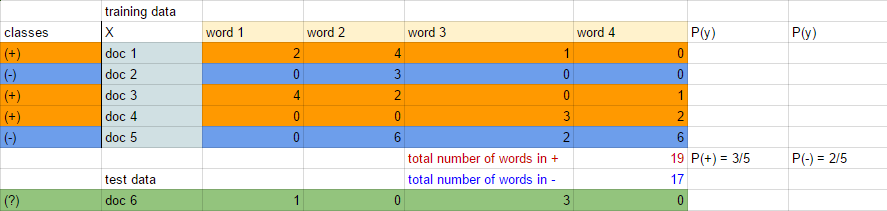

In [48]:
Image(filename="slides/Sent_analysis_toy_data.PNG")

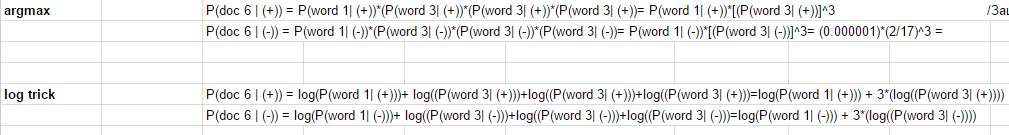

In [49]:
Image(filename="slides/naive_bayes_doc6.PNG")

In [50]:
doc1 = "word1 word1 word2 word2 word2 word2 word3"
doc2 = "word2 word2 word2"
doc3 = "word1 word1 word1 word1 word2 word2 word4"
doc4 = "word3 word3 word3 word4 word4"
doc5 = "word2 word2 word2 word2 word2 word2 word3 word3 word4 word4 word4 word4 word4 word4"

docs = [doc1, doc2, doc3, doc4, doc5]

doc_classes = [1, 0, 1, 1, 0]

doc6 = "word1 word3 word3 word3"

# Let's process the data - FIRST pass over the data

In [51]:
unique_words = []

for doc in docs:
    words = doc.split(" ")
    for word in words:
        if word not in unique_words:
            unique_words.append(word)
            
np_unique_words = np.array(unique_words)
print np_unique_words

['word1' 'word2' 'word3' 'word4']


In [52]:
unique_classes = list(set(doc_classes))
np_unique_classes = np.unique(unique_classes)

unique_classes_label = ['negative', 'positive']
# possitive_class_probability = '+'
# negative_class_probability = '-'

print np_unique_classes

[0 1]


# SECOND pass over the data

In [53]:
word_count = np.zeros((len(unique_classes), len(unique_words)))
print word_count

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [54]:
for i in xrange(len(docs)):
    doc = docs[i]
    words = doc.split(" ")
    label = doc_classes[i]
    for word in words:
        word_index = np.where(np_unique_words == word)[0][0]
        current_count = word_count[label, word_index]
        word_count[label, word_index] = current_count + 1
        #word_count[]
        
print word_count

[[ 0.  9.  2.  6.]
 [ 6.  6.  4.  3.]]


# great, until here we have a matrix with the word counts for the two classes, (+) and (-), we have the count for all words in (+) and in (-), and we have the probabilyt of (+) and (-), also called the prior probability

# to complete: 1) smooth, 2) calculate the probability of doc6 to be of class (+) and class (-) and assign one of these classes to doc6

# 1) Check if there are zero probabilities. If so, set the smoothing factor

In [55]:
# Probability matrix per class and word
prob_class_word = np.zeros((len(unique_classes), len(unique_words)))

# Smoothing factor (initialiazed at zero)
sfactor = 0

# Check if any entry of word_count matrix is zero
# If it is, it's probability will be zero, and we need to assign the smoothing factor
if not (np.where(word_count==0)[0]):
    sfactor = 0.001
    
# Compute all probabilities 
for i in xrange(len(unique_classes)):
    for j in xrange(len(unique_words)):
        prob_class_word[i][j] = (word_count[i][j] + sfactor) / (sum(word_count[i]) + sum(word_count[i])*sfactor)
        
print prob_class_word

[[  5.87647646e-05   5.28941647e-01   1.17588294e-01   3.52647353e-01]
 [  3.15526579e-01   3.15526579e-01   2.10368579e-01   1.57789579e-01]]


# 2) Compute doc6 word probabilities

In [56]:
# Array with unique_word counts for doc6
doc6_word_count = np.zeros((len(unique_words)))

# Construct the array with unique_words
words = doc6.split(" ")
for word in words:
    word_index = np.where(np_unique_words == word)[0]
    # Increment the counter
    doc6_word_count[word_index] += 1
    
print doc6_word_count

[ 1.  0.  3.  0.]


# 3) Compute doc6 class

In [57]:
# Array with probabilities for doc6 classes
# It's initialized with zeros, because we'll use the log rule (summation)
doc6_prob_class = np.zeros(len(unique_classes))

# Compute the log probability of each class
for i in xrange(len(unique_classes)):
    for j in xrange(len(unique_words)):
        doc6_prob_class[i] += math.log10(prob_class_word[i][j])*doc6_word_count[j]

print doc6_prob_class
print "doc6 is from class " + unique_classes_label[np.argmax(doc6_prob_class)]

[-7.01979073 -2.53202143]
doc6 is from class positive
